# Part 1: SLR

Consider a Simple Linear Regression model of the form:

$$
y = \alpha + \beta x + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\epsilon$ is the error term
- $\alpha$ and $\beta$ are parameters to be estimated

Using your brain and a pen, prove that :

$\hat{\beta} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}$

hint : start by $\hat{\alpha}$

# Part 2: MLR

Consider a Muliple Linear Regression model of the form:
$$
y = X \beta + \epsilon
$$

1. What is $\beta$ ?
2. What is $X$ ?
3. What are the dimensions of $X$ & $\beta$
4. Prove that $\hat{\beta} = (X^T X)^{-1} X^T y$
5. What are the dimensions of each element of $\hat{\beta}$
6. Under what conditions $X^T X$ is invertible ?

# Part 3 : Calculate Simple Linear Regression Coefficients


Given the following dataset:
   \( x \) | \( y \) |
 |---------|---------|
 | 1       | 3       |
 | 2       | 5       |
 | 3       | 4       |
 | 4       | 7       |
 | 5       | 6       |

1. Calculate the intercept and slope for a Simple Linear Regression model.
2. Draw the regression line on paper, and then plot it by coding. Compare
4. Calculate the residuals on paper and then by coding. Compare
5. Calculate the SSR on paper and then by coding. Compare
6. Calculate the R_squared on paper and then by coding. Analyse


##### R_squared (Coefficient of Determination)

$R^2$, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It provides insight into the goodness of fit of a model, indicating how well the independent variables explain the variability of the dependent variable.

The $R^2$ value ranges from 0 to 1, where:
- $R^2 = 1$ indicates that the regression model perfectly fits the data.
- $R^2 = 0$ indicates that the model does not explain any of the variability of the response data around its mean.

$R^2$ is calculated using the formula:
$R^2 = 1 - \frac{\text{SSR}}{\text{SST}}$, 

where :
- SSR (Sum of Squared Residuals) is :
  $\text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
- SST (Total Sum of Squares) is :
  $\text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2$

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [45]:
data = [[1,3], [2,5], [3, 4], [4, 7], [5, 6]]
df = pd.DataFrame(data, columns=['x', 'y'])

# OR if you have csv file you can directly create data frame
# df = pd.read_csv("myData.csv")

In [26]:
model = linear_model.LinearRegression()
model.fit(df[['x']], df['y'])

LinearRegression()

Text(0, 0.5, 'Y')

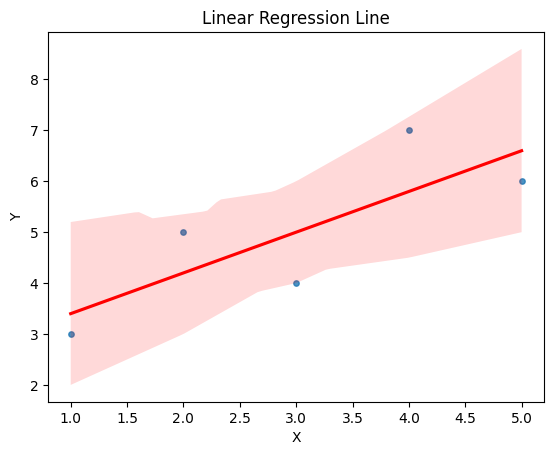

In [49]:

sns.regplot(x='x', y='y', data=df, line_kws={'color':'red'}, scatter_kws={'s':15})
plt.title('Linear Regression Line')
plt.xlabel('X')
plt.ylabel('Y')


In [28]:
y_hat = model.predict(df[['x']])

In [31]:
residuals = df['y'] -y_hat
residuals

0   -0.4
1    0.8
2   -1.0
3    1.2
4   -0.6
Name: y, dtype: float64

In [32]:
SSR = np.sum(residuals**2)
SSR

np.float64(3.5999999999999996)

In [35]:
R_squared = model.score(df[['x']], df['y'])
R_squared

0.64

## Part 4. Coding task: Regression to the California Housing dataset. 

The goal of this task is to predict house prices based on median income using a linear regression model.

### **Tasks:**
1) Divide the dataset into training and testing sets.
2) Fit a linear regression model using the training data.
3) Make predictions on the test data
4) Evaluate the model’s performance using appropriate metrics, such as Mean Squared Error (MSE) and R² score.
5) Plot the regression line on a scatter plot of the actual data to visually assess the model’s fit.
6) Plot the residuals distribution
7) Repeat those steps by using more features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['HousePrice'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HousePrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
X = df[['MedInc']]
y = df['HousePrice']


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
model.coef_

array([0.41788087])

In [19]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coef'])
print(cdf)

            Coef
MedInc  0.417881


In [23]:
y_predict = model.predict(X_test)


In [24]:
y_predict

array([1.15221696, 1.50745749, 1.90394286, ..., 1.35509812, 3.3275794 ,
       3.22110336], shape=(5160,))

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
mse

0.7001962368292409

In [53]:
r2 = r2_score(y_test, y_predict)
r2

0.47083837938023365

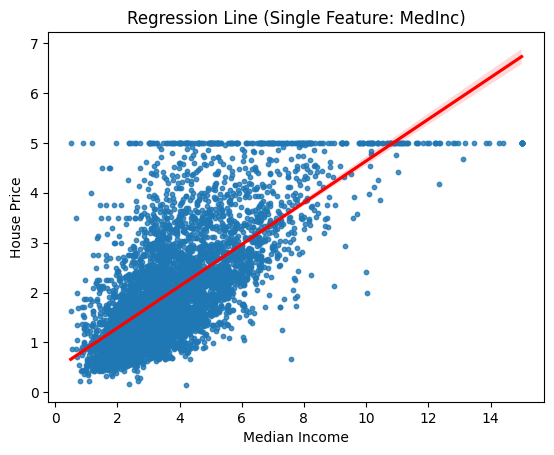

In [27]:
sns.regplot(x=X_test, y=y_test, line_kws={"color": "red"}, scatter_kws={"s": 10})
plt.title("Regression Line (Single Feature: MedInc)")
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()

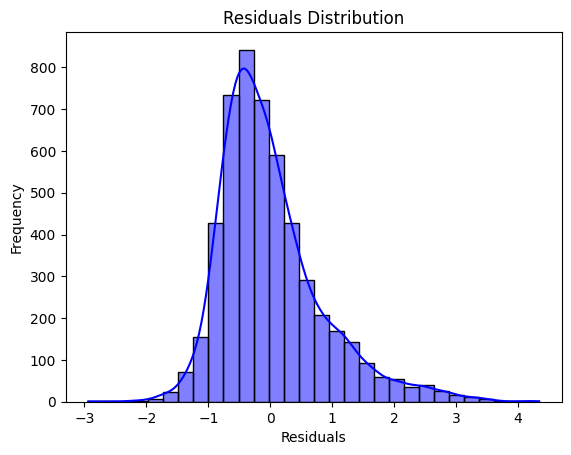

In [28]:
residuals = y_test-y_predict

sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title("Residuals Distribution")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [29]:
X_all_features = df[['AveRooms', 'AveOccup', 'MedInc', 'HouseAge', 'Latitude', 'Longitude']]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_features, y, test_size=0.25, random_state = 42)

In [30]:
model.fit(X_train_all, y_train_all)

LinearRegression()

In [31]:
y_predict_all = model.predict(X_test_all)

In [32]:
mse_all = mean_squared_error(y_test_all, y_predict_all)
mse_all

0.5357730420236609

In [33]:
r2_all = r2_score(y_test_all, y_predict_all)
r2_all

0.5950984648454156

In [ ]:
residuals = y_test_all - y_predict_all

<Axes: xlabel='HousePrice', ylabel='Count'>

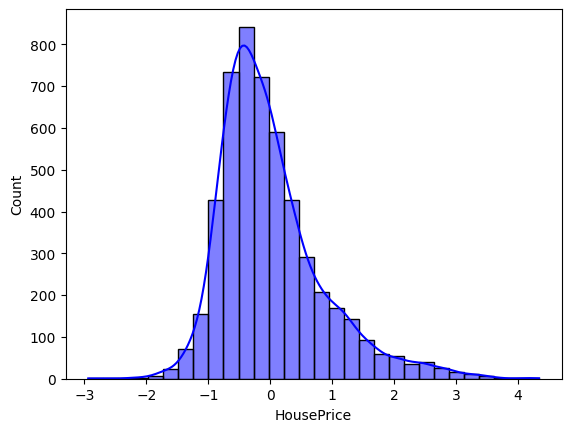

In [38]:
sns.histplot(residuals, kde=True, color='blue', bins=30)